In [1]:
import numpy as np
from numba import jit, njit
from matplotlib import pyplot as plt

In [2]:
# ### Establish intial conditions
# # grid
# size = 101
# midpoint = int((size-1)/2)
# grid = np.zeros((size, size))
# # center point is occupied
# grid[midpoint, midpoint] = 1
# plt.imshow(grid)

In [21]:
### randomly instantiate particles 
# we can decide all the pseudorandom starting locations ahead of time 
# this saves computing time
# class particles():
#     def __init__(self, N, position, stuck, r=1.0):
#         self.N = N
#         self.position = position
#         self.stuck = stuck
#         self.r = r
#     def diffuse(self):
#         v = np.where(stuck==1, np.random.uniform(-1,1,size=position.shape),0)
#         new_pos = position + v
#         self.position = new_pos
def show(position, stuck_pos, lim=15):
    plt.figure(figsize=(6.8,6))
    plt.scatter(position[0], position[1], marker='.', color='red')
    plt.scatter(stuck_pos[0], stuck_pos[1], marker='.', color='blue')
    plt.ylim(-lim,lim)
    plt.xlim(-lim,lim)
    plt.show();

def start_position(N, bound):
    start_angle = np.random.uniform(0, 2.0*np.pi)
    start_angles = np.linspace(start_angle, start_angle+2.0*np.pi, N)
    x0 = np.cos(start_angles)*bound
    y0 = np.sin(start_angles)*bound
    position = np.array([x0, y0])
    return position



In [ ]:
### calculate the distance between two particles
@njit
def dist(p1, p2, i, j):
    d = np.sqrt(((p1[:,i] - p2[:,j])**2).sum())
    return d

### calculate the distance from the original center
@njit
def dist_center(p, i):
    d = np.sqrt(((p[:,i] - 0.0)**2).sum())
    return d

### Check for stuckness
@njit
def check(position, unstuck, stuck_pos, restarts, rest_ind, bound, wave, N):
    for i in range(N): # for each active particle
        if unstuck[i] == 1: # if the particle is not stuck
            d_center = dist_center(position, i) # check distance to the center
            if d_center > 1.3*bound:
                # reset if far away from the spawn line
                position[:,i] = restarts[:,rest_ind]
                rest_ind += 1 # increment so that restarts are different
            for j in range(wave*N+i): # then check every particle that does exist
                distance = dist(position, stuck_pos, i, j) # distance between these two particles.
                #print(i, j, (position[:,i] - stuck_pos[:,j]))
                if distance <= 2.0*r: # if these two particles are close enough
                    #print(i, 'stuck')
                    #print(i, 'stuck', d,(position[:,i] - stuck_pos[:,j]))
                    unstuck[i] = 0 # then i is no longer unstuck
                    stuck_pos[:, wave*N + i] = position[:, i] # record it's position 
                    break # break out of this loop and check the next particle
    return(unstuck, stuck_pos)

@njit
def diffuse(position, unstuck):
    v = unstuck * np.random.uniform(-1,1,size=position.shape)
    new_pos = position + v
    return new_pos



In [41]:
#%timeit check(position, unstuck, stuck_pos, restarts, rest_ind, bound)   

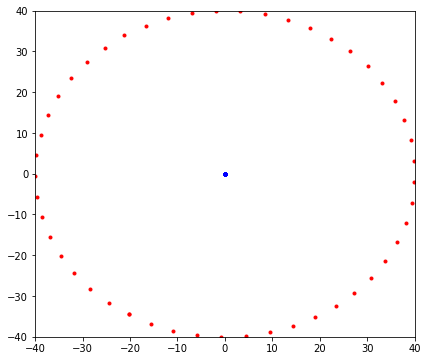

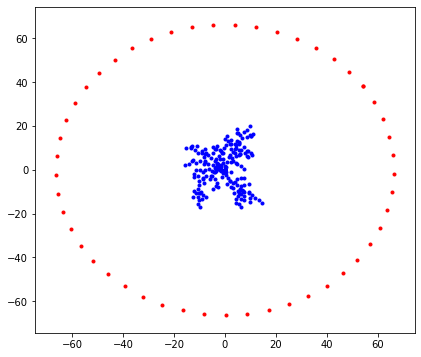

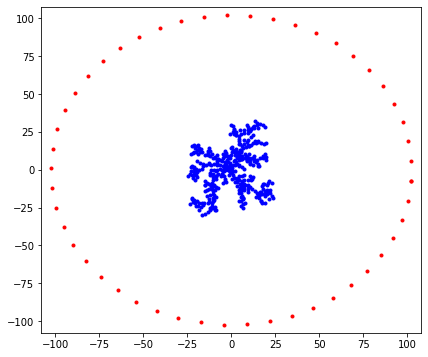

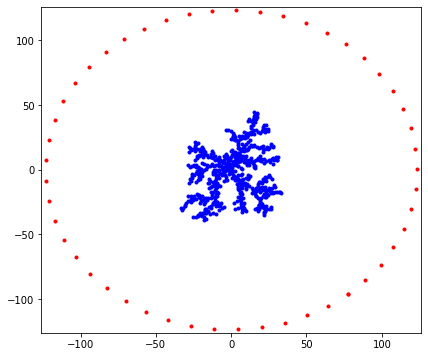

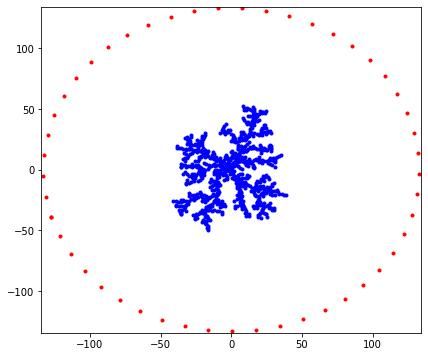

KeyboardInterrupt: 

In [52]:
NN = 2001 # Total number of particles     
N = 50 # number of particles active
wave = 0


bound0 = 40.0
bound = 1.0*bound0
r = 1.0
position = start_position(N, bound0)
unstuck = np.ones(N)
unstuck[0] = 0
stuck_pos = np.zeros((2, NN))
k=N/10.0
while wave*N+1 < NN: 
    bound = bound + k*wave
    restarts = start_position(N, bound)
    rest_ind = 0
    if wave%5 == 0:
        show(position, stuck_pos, lim=bound)
    while unstuck.sum()/N > 0.2:
        position = diffuse(position, unstuck)
        unstuck, stuck_pos = check(position, unstuck, stuck_pos, restarts, rest_ind, bound, wave, N)
    wave += 1
    position = start_position(N, bound)
    unstuck = np.ones(N)
    k = 0.8*k
show(position, stuck_pos, lim=bound) 



In [68]:
### Cell for continuing the run started above.

while wave*N+1 < NN: 
    bound = bound + k*wave
    restarts = start_position(N, bound)
    rest_ind = 0
    if wave%5 == 0:
        show(position, stuck_pos, lim=bound)
    while unstuck.sum()/N > 0.2:
        position = diffuse(position, unstuck)
        unstuck, stuck_pos = check(position, unstuck, stuck_pos, restarts, rest_ind, bound, wave, N)
    wave += 1
    position = start_position(N, bound)
    unstuck = np.ones(N)
    k = 0.8*k
show(position, stuck_pos, lim=bound) 

1551 2001


KeyboardInterrupt: 

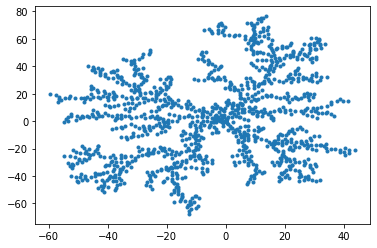

In [64]:
plt.scatter(stuck_pos[0], stuck_pos[1], marker='.')

In [66]:
len(stuck_pos[0])

2001